Autor: Arthur Pinheiro Nascimento

Data: 20/12/2023

DRE: 121122575

#Introdução

Este trabalho se propõe a utilizar o Movimento Browniano Geométrico (MGB) e o méotdo de Monte Carlo para fazer previsões de preços de ações do mercado financeiro. Processos estocásticos se mostram muito úteis nesse tipo de previsão devido à alta imprevisibilidade e comportamentos exponenciais no mercado financeiro.

#Movimento Browniano Geométrico
O MGB é utilizado justamente por ser bom nas características destacadas acima. Diferentemente do Movimento Browniano padrão, em que o preço de um ativo varia de forma linear, o MGB que o logaritmo do preço assume um Movimento Browniano padrão, o que é consistente com a propriedade de alguns ativos de serem multiplicativos.

O MGB possui dois parâmetros principais :
*  μ: Retorno esperado (média)
*  σ: Volatilidade do ativo (variância)

A equação diferencial estocástica que descreve o MGB tem a forma:

$$
dS(t)=\mu S(t)dt+\sigma S(t)dW(t)
$$

onde:
*  $μ$: Retorno esperado (média)
*  $σ$: Volatilidade do ativo (variância)
*  $dS(t)$: diferencial infinetsimal do preço doa tivo pelo tempo
*  $S(t)$: preço do ativo no tempo t
*  $dt$: variação infinitesimal do tempo
*  $dW(t)$: variação infinitesimal de um movimento browniano padrão

Asolução analítica dela nos retorna a seguinte equação:

$$
S(t)=S(0) ⋅ e^{(μ-0.5σ^2)⋅t+σW(t)}
$$

Isso demonstra que o MGB segue um cresciemnto exponencial determinístico que depende fortemente da média $(μ)$ e de $σW(t)$

A esperança de S(T) é:

$$
E[S(t)]=S(0)⋅e^{μt}
$$

#Monte Carlo

Simulações de Monte Carlo são uma técnica estatística utilizada para modelar, analisar e prever o comportamento de sistemas complexos. Essa abordagem envolve a geração repetida de números aleatórios com base em distribuições de probabilidade conhecidas, permitindo a criação de cenários de simulação. Através dessas simulações, é possível estimar resultados e quantificar a incerteza associada a um determinado problema.

Para realizar uma simulação de Monte Carlo, é necessário definir o modelo matemático que descreve o sistema em estudo, bem como as distribuições de probabilidade que governam as variáveis-chave do modelo. Em seguida, são gerados números aleatórios para cada variável, de acordo com as distribuições especificadas. Com base nesses valores simulados, são realizados cálculos e análises para obter estimativas estatísticas dos resultados desejados.

A principal vantagem das simulações de Monte Carlo é a capacidade de lidar com a incerteza e a complexidade de forma abrangente. Ao considerar diferentes cenários aleatórios, é possível obter uma compreensão mais profunda do comportamento do sistema em estudo e tomar decisões mais informadas.

Em resumo, as simulações de Monte Carlo são uma ferramenta poderosa para modelagem e previsão de sistemas complexos, permitindo a análise estatística de resultados e a quantificação da incerteza. Elas desempenham um papel fundamental em várias áreas, auxiliando na tomada de decisões, na gestão de riscos e no desenvolvimento de estratégias mais robustas.

#Previsão

Para fazer as previsões utiliza-se a seguinte fórmula:

$$
S_{t-1}=S_t⋅e^{(μ-0.5σ^2)dt+σ\sqrt{dt} Z}
$$

onde:

*  $S_{t-1}$: preço do ativo no tempo t-1
*  $S_t$: preço do ativo no tempo t
*  $dt$: intervalo de tempo entre t-1 e t
*  $Z$: v.a tal que $Z$ ~ $N(0,1)$

Assim segue-se o algoritmo para os cálculos:


1.   Escolher ativo
2.   Definir o retorno esperado do ativo por unidade de tempo μ e o desvio padrão do ativo por unidade de tempo σ (aqui cacula-se baseado na série histórica do ativo, essa é apenas uma das opções para calcular o μ e o σ, por exemplo, eles podem ser definidos arbitrariamente baseados na expertise do analista);
3.  Definir o S0 como sendo o último valor real da série histórica baseado na unidade de tempo definida (nesse trabalho escolheu-se a unidade de tempo dia, logo caso estejamos avaliando o valor de fechamento do ativo, deverá ser utilizado o valor de fechamento do diário);
4. Implementar a equação (15)
5. Plotar e analisar resultados



#Implementação


In [4]:
#!pip install -q yfinance

In [12]:
#Bibliotecas utilizadas
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import yfinance as yf

In [117]:
def gbm_sim(S0, mu, sigma, T, n):
  """
  Simula um Movimento Browniano Geométrico prevendo preços no mercado de ações.

  Args:
    df: DataFrame com os preços do ativo
    T: Diferença entre t e t-1 (1 dia nesse caso).
    n: Números de dias simulados.

  Returns:
    Dataframe com os preços simulados.
  """

  dt = T / n
  z = norm.ppf(np.random.rand(n))
  St = np.zeros(n + 1)
  St[0] = S0

  for i in range(1, n + 1):
    St[i] = St[i - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z[i - 1])

  return pd.DataFrame(St, columns=['Price'])



[*********************100%%**********************]  1 of 1 completed


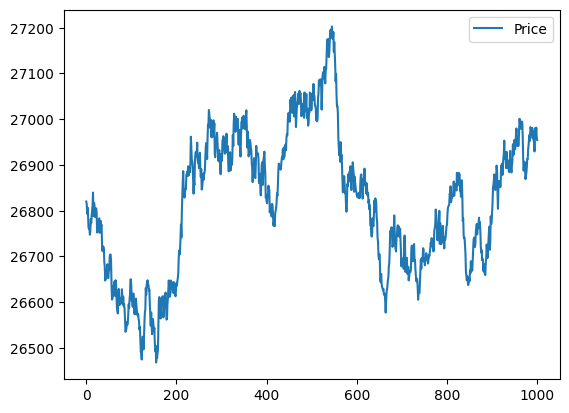

In [119]:
# Simulando.
ativo = "BTC-USD"  # Bitcoin
dataset = pd.DataFrame(yf.download(ativo, start='2023-06-01',end='2023-07-01')['Close'])

# Tratando df
df = np.log(1 + dataset.pct_change())
df.fillna(0, inplace=True)

S0 = dataset['Close'][0]
mu = df.mean()[0]
sigma = df.std()[0]
T = 1
n = 1000 # Simulando n dias à frente
gbm_sim(S0, mu, sigma, T, n).plot()
plt.show()


#Conclusão
Este trabalho abordou como funciona o MGB e o método de monste Carlo e apresentou uma aplicação prática e muito útil dessas duas ferramentas. Por ser um processo estocástico, cada simulação vai ser diferente, então para uma melhor previsão o ideal seria rodar a função várias vezes e ver se o ativo realmente segue um padrão.

#Referência
*  https://medium.com/@hagijakobson/previsao-do-preco-de-acoes-com-processos-estocasticos-e-simulacoes-de-monte-carlo-3a01bfbf9a59